In [1]:
import Ab as ab
import datetime as dt
import pandas as pd

#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2010,4,10) - dt.timedelta(days=200)
ed = dt.datetime(2023,4,10) + dt.timedelta(days=1)

def get_data(name:str, sd, ed):
    d = ab.StockData(name)
    w = ab.StockData(name)
    d.get_data_from_yfinance(name, sd, ed, interval='1d')
    w.get_data_from_yfinance(name, sd, ed, interval='1wk')
    return d,w


ticker, ticker_weekly = get_data('TQQQ', sd, ed)

#set max number of rows to display
pd.set_option('display.max_rows', 1000)

GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
ticker.get_k('Close', 14)
ticker.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
ticker.get_ema('Close-K14', 5)
ticker.get_ema('Close-K14-EMA5', 5)
ticker.data.rename(columns={'Close-K14-EMA5-EMA5':'D%D', 'Close-K14-EMA5':'D%K'}, inplace=True)



In [3]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
ticker_weekly.get_k('Close', 14)
ticker_weekly.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
ticker_weekly.get_ema('Close-K14', 5)
ticker_weekly.get_ema('Close-K14-EMA5', 5)
#rename to %K and %D
ticker_weekly.data.rename(columns={'Close-K14-EMA5-EMA5':'W%D', 'Close-K14-EMA5':'W%K'}, inplace=True)


<Axes: xlabel='Date'>

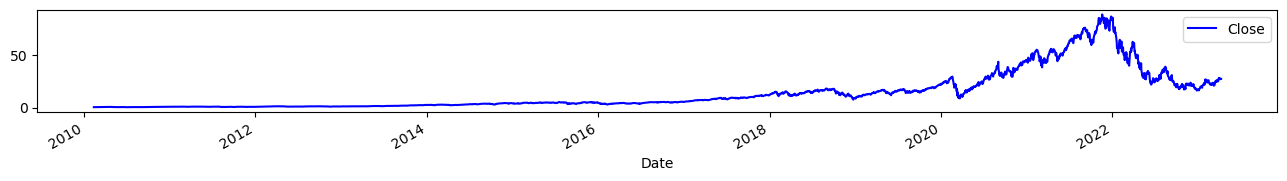

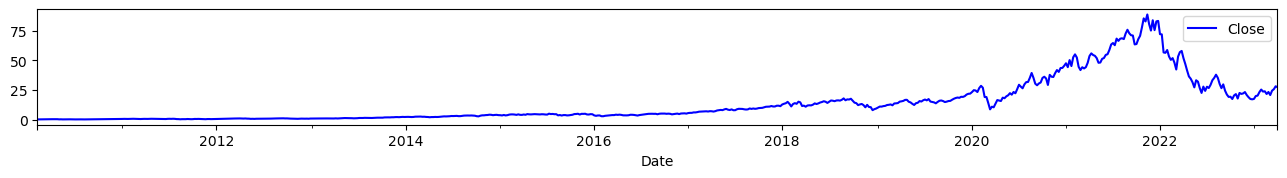

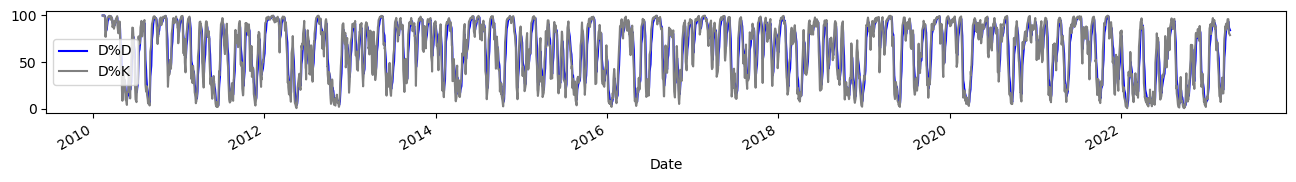

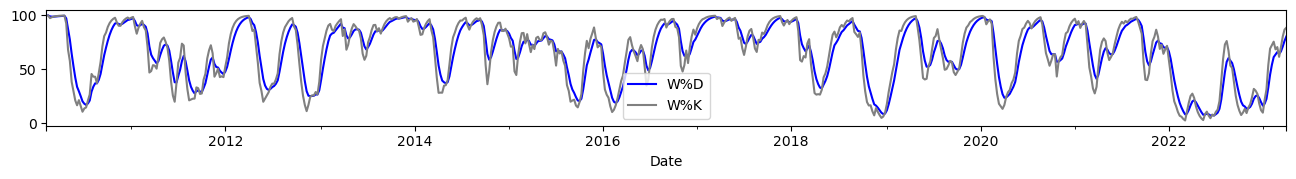

In [4]:
ticker.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
ticker_weekly.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
#plotting the slow stochastic oscillator with blue and green lines
ticker.data.plot(y=['D%D','D%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'])
#plotting the slow stochastic oscillator with blue and green lines
ticker_weekly.data.plot(y=['W%D', 'W%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],)

In [5]:
test_start = dt.datetime(2018,4,10)
test_end =   dt.datetime(2023,4,10)
plot_start = dt.datetime(2021,4,10)
plot_end =   dt.datetime(2023,4,10)

In [6]:
#buy and hold
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
bah.run_strategy(ticker,test_start,test_end)

In [7]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7fbbbc6b2ef0>:
cumulative return      : 126.39%
compound anual return  : 3.4018%
max_drawdown           : -81.11%
sharp_ratio            : 3.81%
average of daily return: 0.1847%
std of daily return    : 4.8481%
number of trades       : 2,
trading days           : 1826,
batting Average        : 100.00%
Gain Average           : 126.39%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0 2018-04-10  2023-04-10 00:00:00   TQQQ  0.082713      12.09   27.370001   

     Profit  Profit %  
0  1.263854  1.263854  


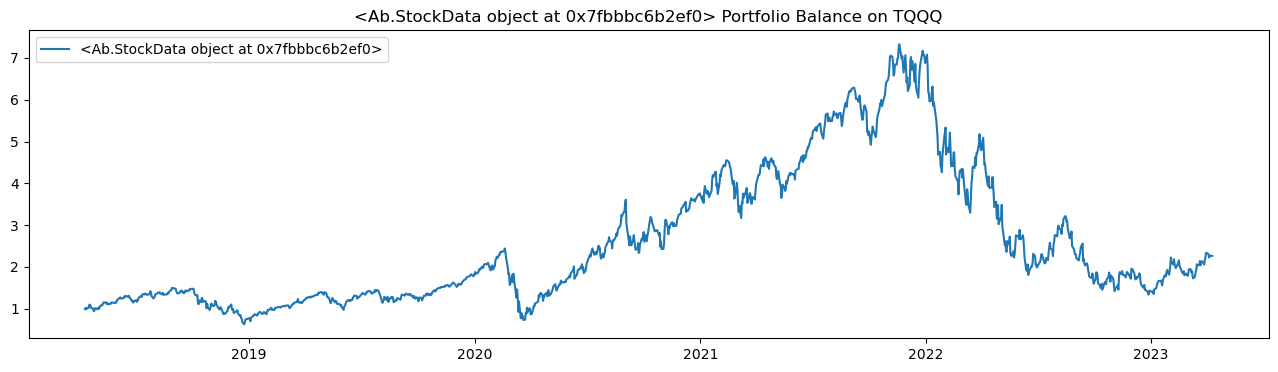

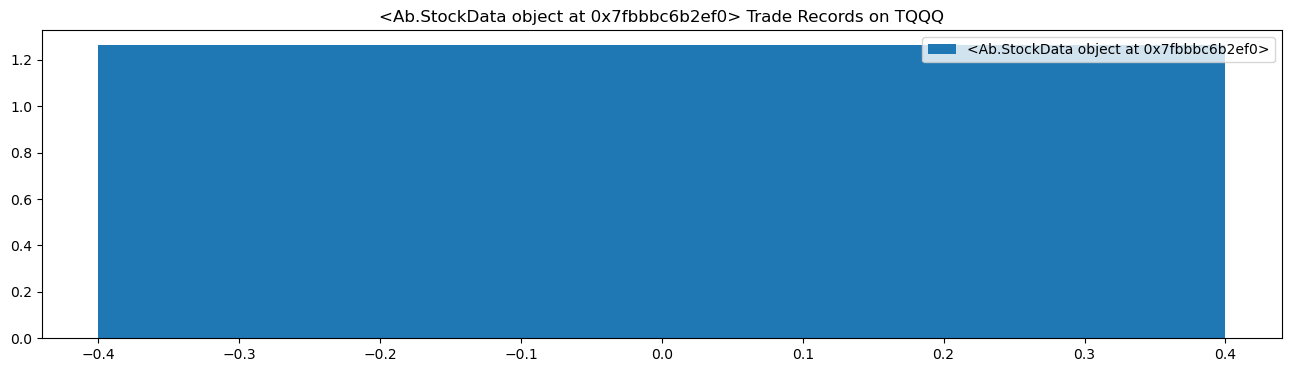

In [8]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [9]:
stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 0)
stg.run_strategy([ticker,ticker_weekly], test_start, test_end)
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,ticker,test_start,test_end)



StochasticCross:
cumulative return      : 1754.71%
compound anual return  : 50.5718%
max_drawdown           : -33.77%
sharp_ratio            : 9.99%
average of daily return: 0.2687%
std of daily return    : 2.6891%
number of trades       : 20,
trading days           : 1826,
batting Average        : 73.68%
Gain Average           : 27.21%
Loss Average           : -6.05%
Risk Reward Ratio      : 4.50
Gain STD               : 17.88%
Loss STD               : 5.27%
        


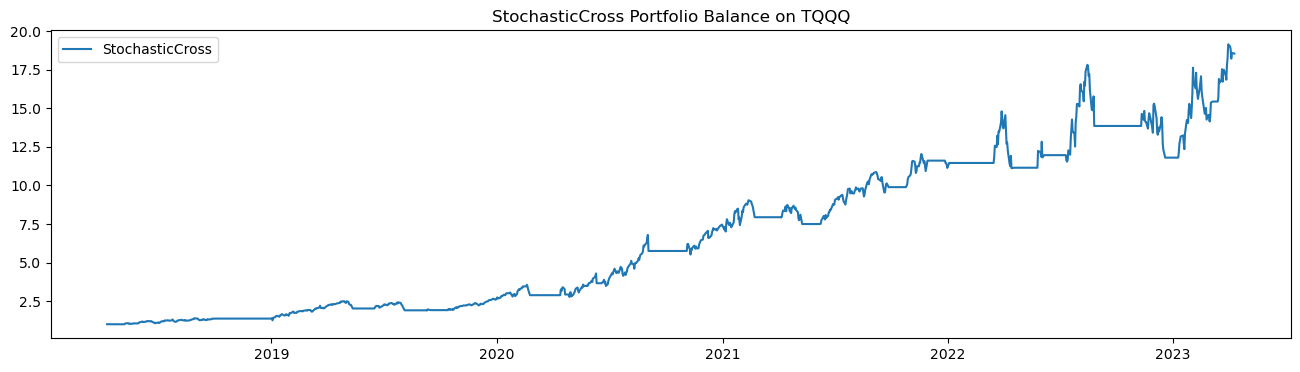

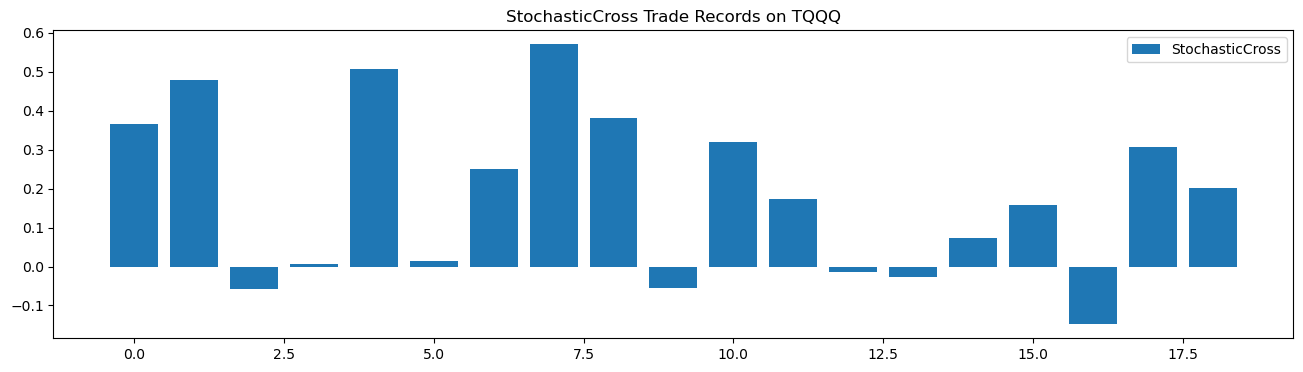

In [10]:

sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()


Index(['TQQQ', 'Weekday', 'Signal_x', 'Cash', 'Stock', 'Total', 'Margin',
       'Trade', 'Buy Price', 'Profit', 'DClose', 'D%K', 'D%D', 'WClose', 'W%K',
       'W%D', 'W%K-UP', 'Signal_y', 'Stoploss'],
      dtype='object')


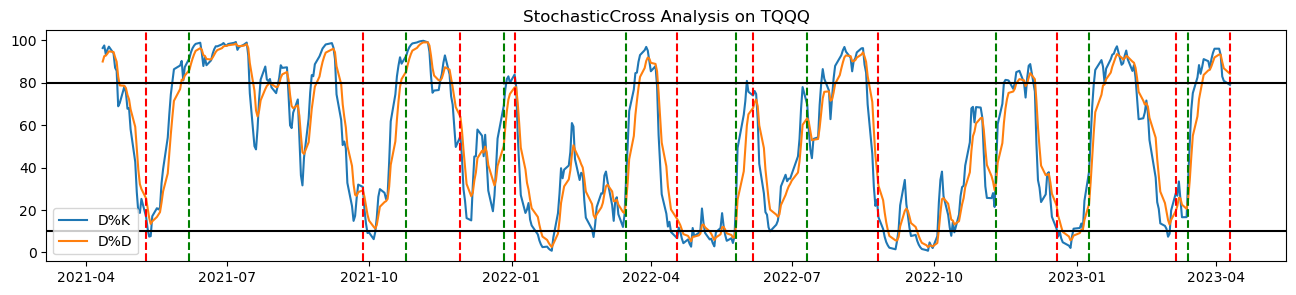

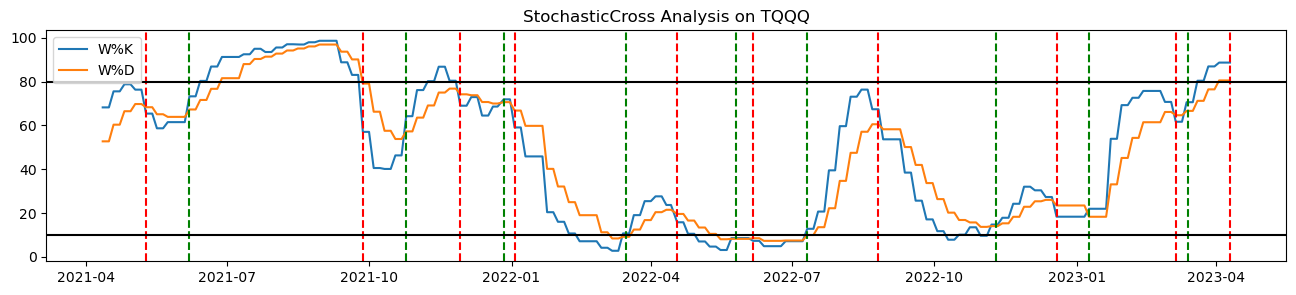

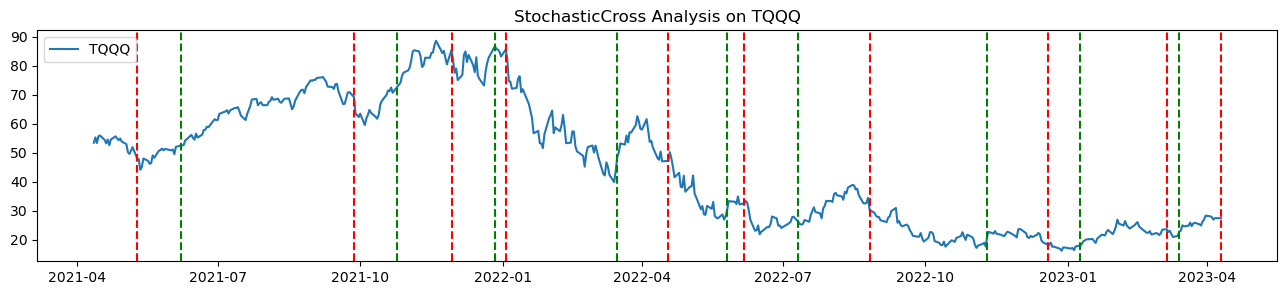

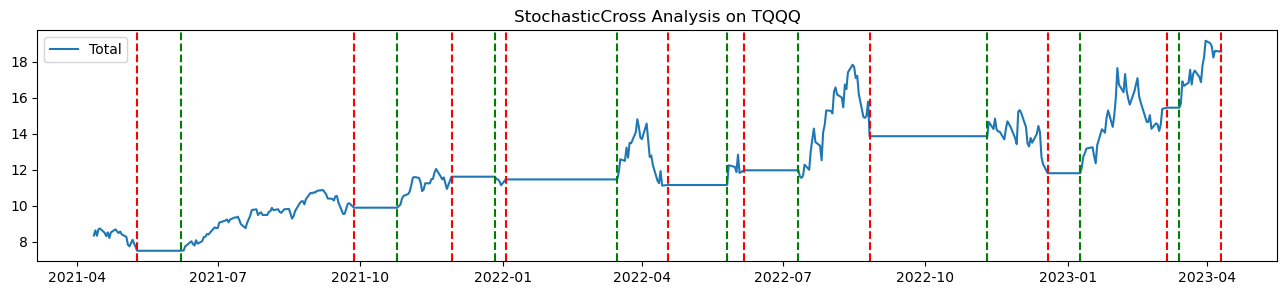

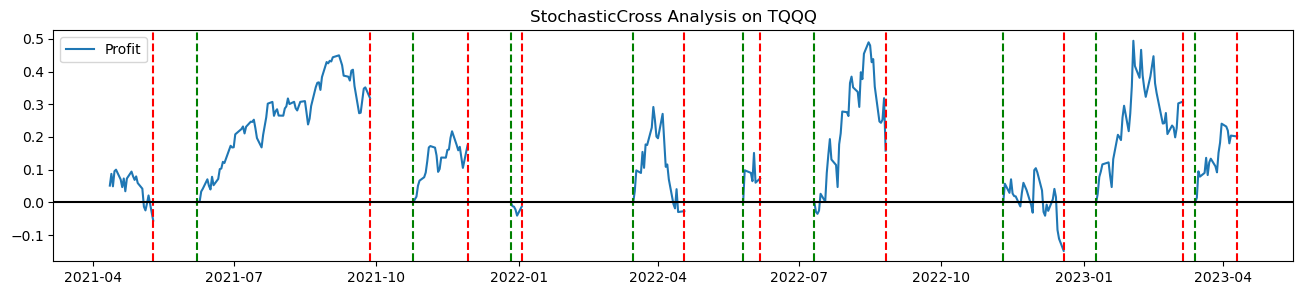

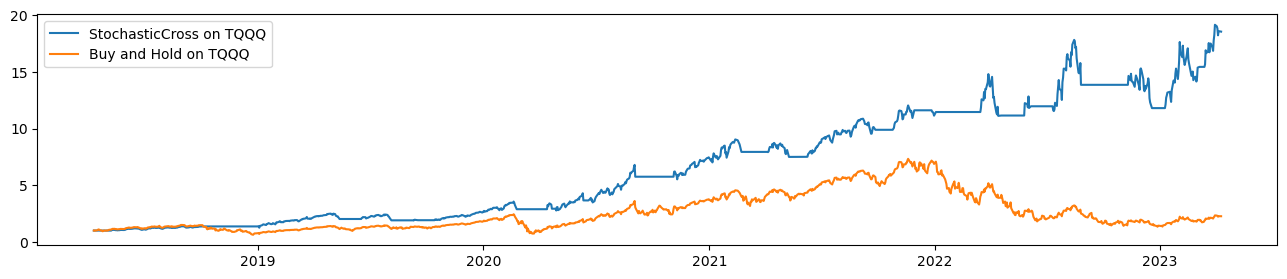

In [11]:
print(sc_bt.joined_data.columns)
sc_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
sc_bt.plot_joined_data(['Total'], plot_start, plot_end)
sc_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(sc_bt.balance.index, sc_bt.balance['Total'], label = '{} on {}'.format(sc_bt.name, ticker.ticker))
plt.plot(bah_bt.balance.index, bah_bt.balance['Total'], label = 'Buy and Hold on {} '.format(ticker.ticker))
plt.legend()


StochasticCross:
cumulative return      : 492.35%
compound anual return  : 25.5729%
max_drawdown           : -39.92%
sharp_ratio            : 7.16%
average of daily return: 0.1699%
std of daily return    : 2.3726%
number of trades       : 27,
trading days           : 1826,
batting Average        : 53.85%
Gain Average           : 20.20%
Loss Average           : -5.30%
Risk Reward Ratio      : 3.81
Gain STD               : 17.87%
Loss STD               : 3.32%
        


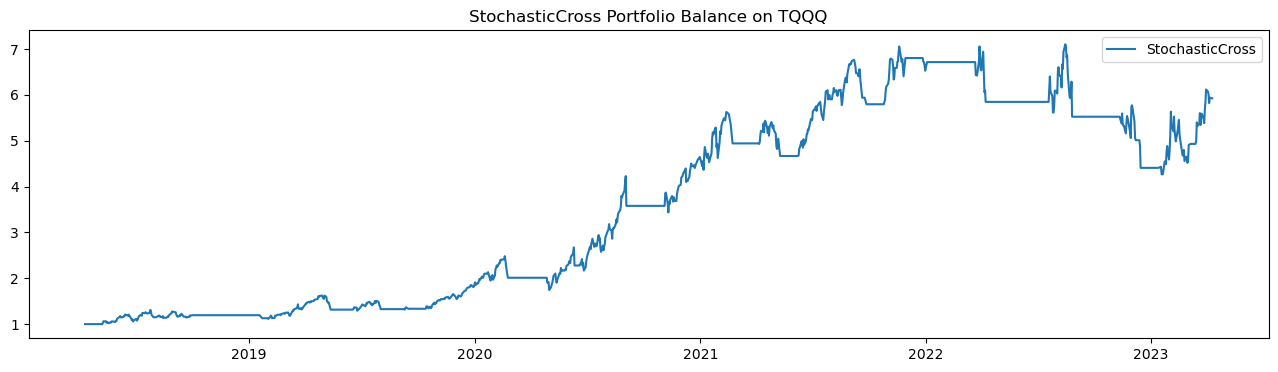

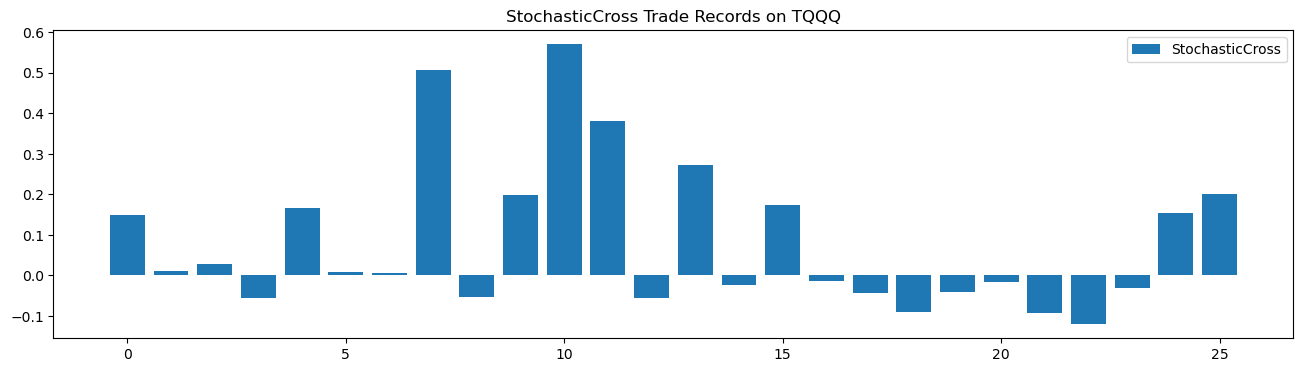

In [12]:
stg_50ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, ma_notrade=50)
stg_50ma.run_strategy([ticker,ticker_weekly], test_start, test_end)

stg_50ma_bt = ab.BackTest()
stg_50ma_bt.run_backtest(stg_50ma,ticker,test_start,test_end)
stg_50ma_bt.plot_balance()
stg_50ma_bt.plot_records()
stg_50ma_bt.performance_summary()

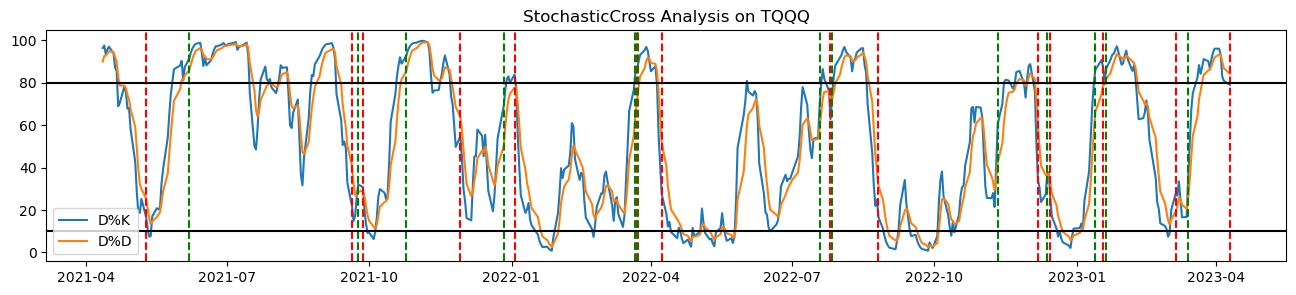

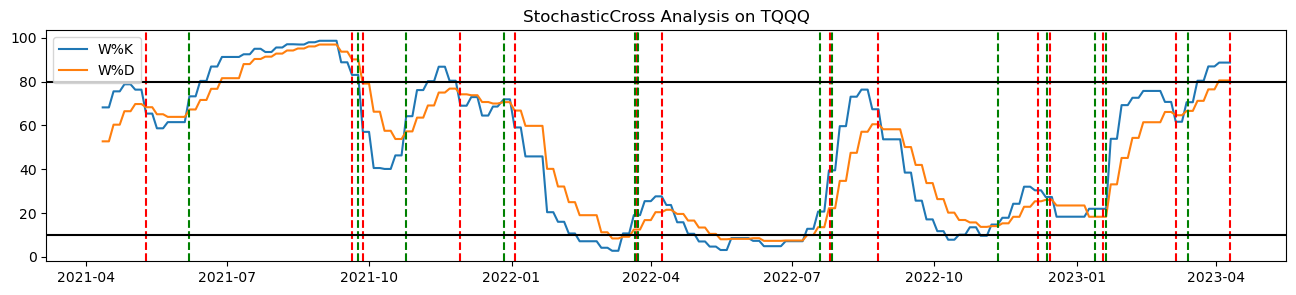

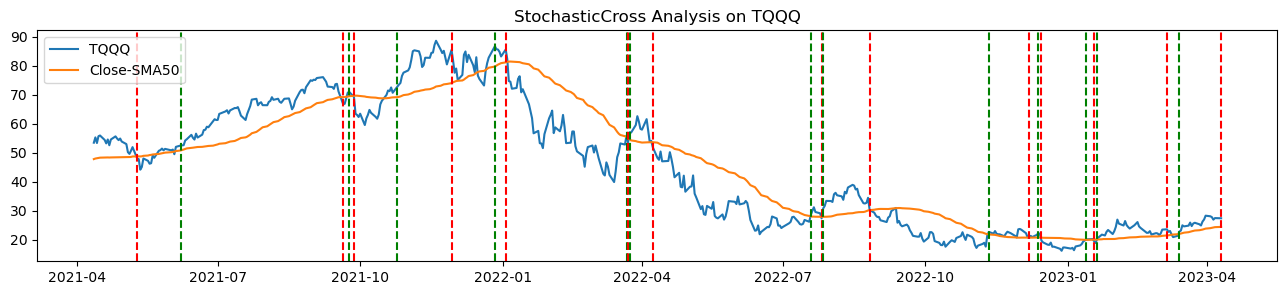

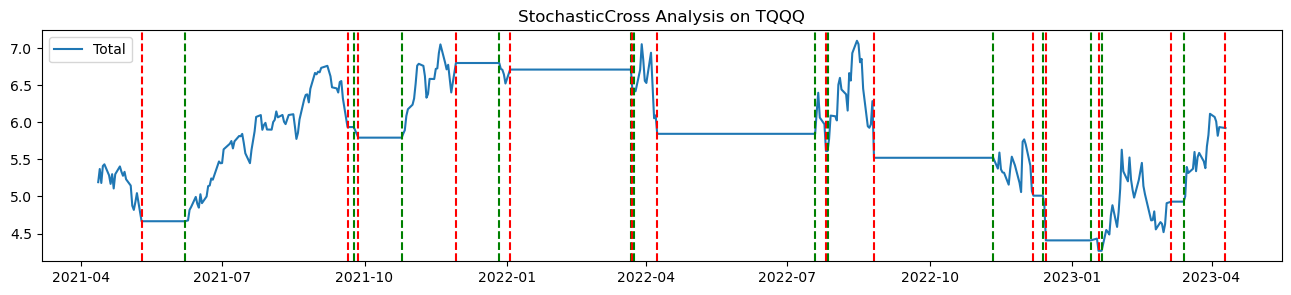

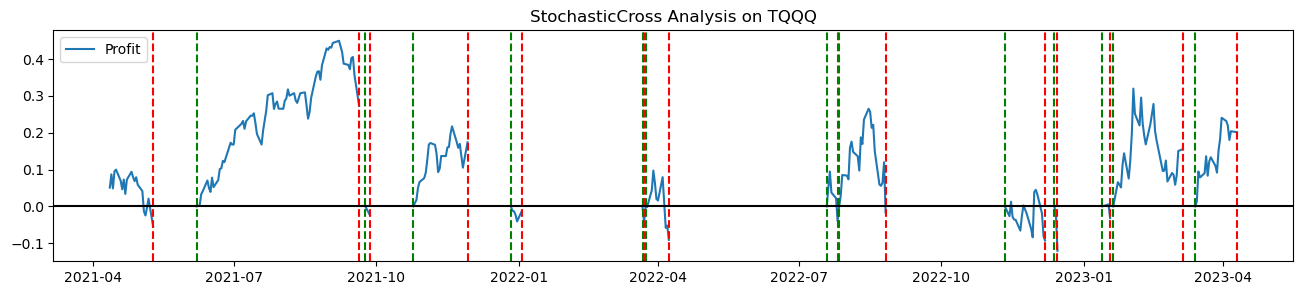

In [13]:
stg_50ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data([ticker.ticker, 'Close-SMA50'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)


StochasticCross:
cumulative return      : 473.44%
compound anual return  : 24.8725%
max_drawdown           : -24.34%
sharp_ratio            : 8.05%
average of daily return: 0.1587%
std of daily return    : 1.9721%
number of trades       : 18,
trading days           : 1826,
batting Average        : 52.94%
Gain Average           : 27.73%
Loss Average           : -4.36%
Risk Reward Ratio      : 6.36
Gain STD               : 19.87%
Loss STD               : 2.26%
        


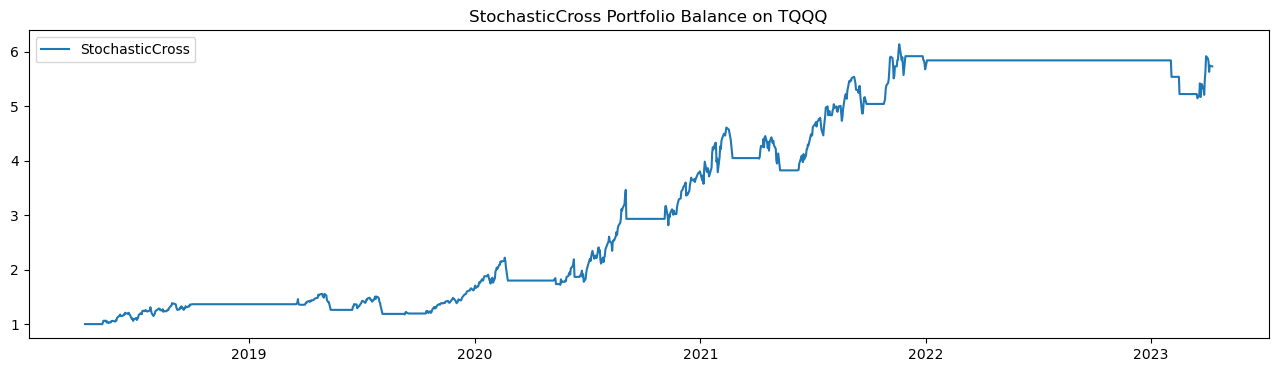

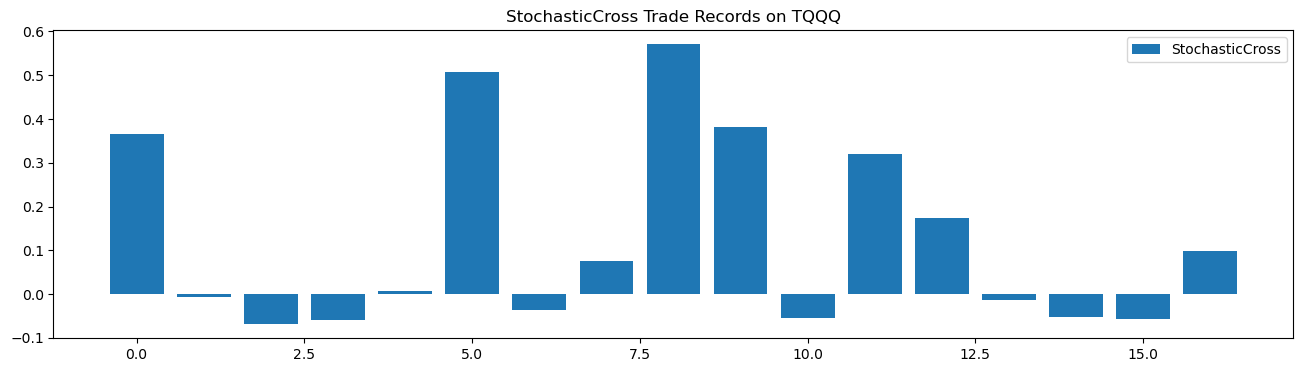

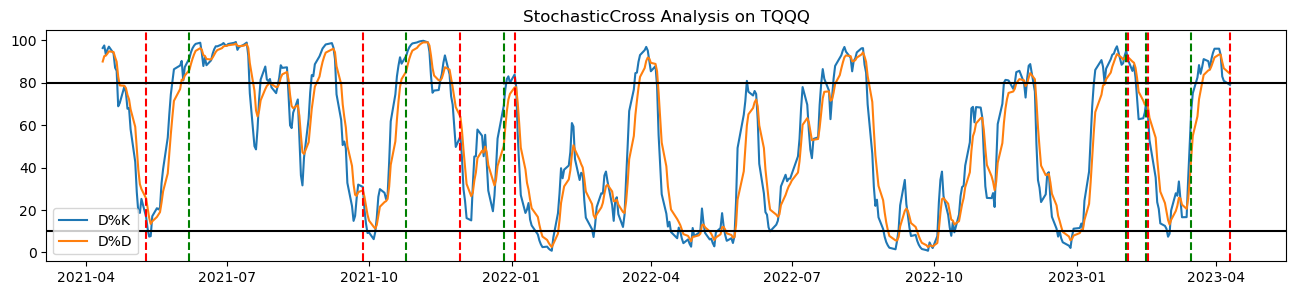

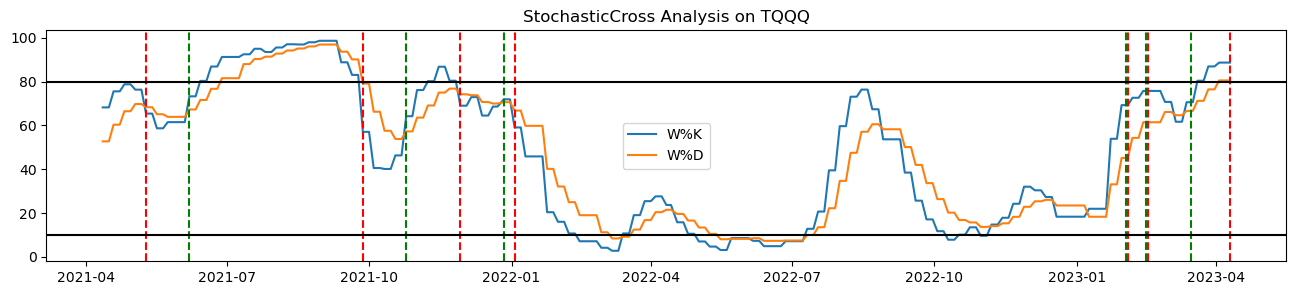

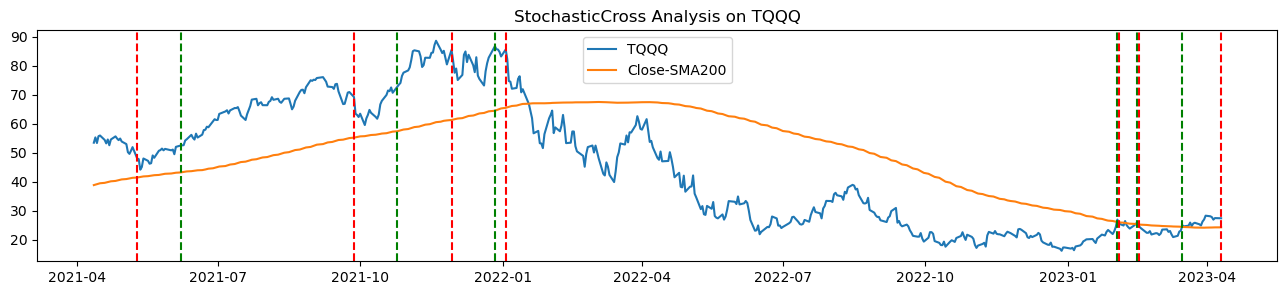

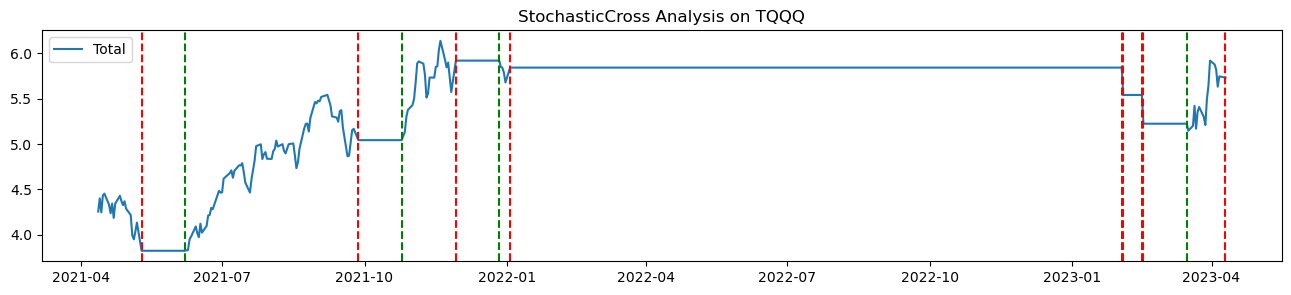

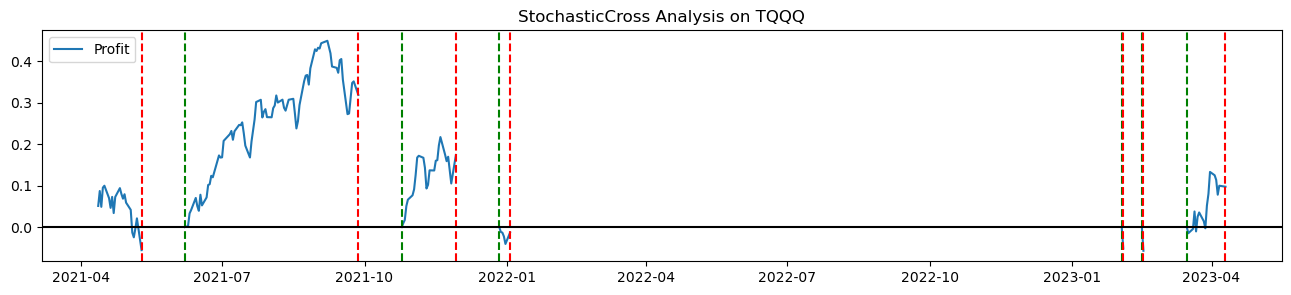

In [14]:
stg_200ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, ma_notrade=200)
stg_200ma.run_strategy([ticker,ticker_weekly], test_start, test_end)

stg_200ma_bt = ab.BackTest()
stg_200ma_bt.run_backtest(stg_200ma,ticker,test_start,test_end)

stg_200ma_bt.plot_balance()
stg_200ma_bt.plot_records()
stg_200ma_bt.performance_summary()

stg_200ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data([ticker.ticker,'Close-SMA200'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)